In [24]:
!pip install pycaret
!pip install shap

In [25]:
"""
    Import library
"""
##-- PyCaret
import pycaret
from pycaret.regression import *
##-- Pandas
import pandas as pd
from pandas import Series, DataFrame
##-- Scikit-learn
import sklearn

In [26]:
"""
    Load the dataset from scikit-learn
"""
from sklearn.datasets import load_boston
dataset = load_boston()

df = pd.DataFrame(dataset.data)
df.columns = dataset.feature_names
df["PRICES"] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
"""
    Split the dataset into the train and test datasets
"""
split_rate = 0.8
data = df.iloc[ : int(split_rate*len(df)), :]
data_pre = df.iloc[ int(split_rate*len(df)) :, :]

In [28]:
"""
    Set up the model
    
    "data": input data
    "target": target data
    "session_id": random seed
"""
model_reg = setup(data = data, target = "PRICES", session_id=99, html=False, silent=True, verbose=False)

In [29]:
"""
    Drop the "CHAS" column from the dataset
    since "CHAS" is NOT continuous data type,
    categorical type.
"""
data = data.drop('CHAS', 1)

In [30]:
"""
    Reset up the model
    
    "data": input data
    "target": target data
    "session_id": random seed
"""
model_reg = setup(data = data, target = "PRICES", session_id=99, html=False, silent=True, verbose=False, )

In [31]:
"""
    Compare the model
"""
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014
en,Elastic Net,3.4070,23.0626,4.6859,0.7096,0.2079,0.1513,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lar,Least Angle Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.014
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014
en,Elastic Net,3.4070,23.0626,4.6859,0.7096,0.2079,0.1513,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lar,Least Angle Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.014
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014
en,Elastic Net,3.4070,23.0626,4.6859,0.7096,0.2079,0.1513,0.014
llar,Lasso Least Angle Regression,6.6128,80.8678,8.9412,-0.0306,0.3558,0.3229,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lar,Least Angle Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.014
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014
en,Elastic Net,3.4070,23.0626,4.6859,0.7096,0.2079,0.1513,0.014
omp,Orthogonal Matching Pursuit,3.5044,27.0820,4.9226,0.6601,0.2362,0.1830,0.012
llar,Lasso Least Angle Regression,6.6128,80.8678,8.9412,-0.0306,0.3558,0.3229,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2.8888,17.7506,4.0325,0.7770,0.2217,0.1385,0.013
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lar,Least Angle Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.014
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014
en,Elastic Net,3.4070,23.0626,4.6859,0.7096,0.2079,0.1513,0.014
omp,Orthogonal Matching Pursuit,3.5044,27.0820,4.9226,0.6601,0.2362,0.1830,0.012
llar,Lasso Least Angle Regression,6.6128,80.8678,8.9412,-0.0306,0.3558,0.3229,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2.8888,17.7506,4.0325,0.7770,0.2217,0.1385,0.013
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lar,Least Angle Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.014
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014
en,Elastic Net,3.4070,23.0626,4.6859,0.7096,0.2079,0.1513,0.014
omp,Orthogonal Matching Pursuit,3.5044,27.0820,4.9226,0.6601,0.2362,0.1830,0.012
llar,Lasso Least Angle Regression,6.6128,80.8678,8.9412,-0.0306,0.3558,0.3229,0.013
par,Passive Aggressive Regressor,8.4203,122.8335,10.2747,-0.5646,0.4603,0.4107,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2.8888,17.7506,4.0325,0.7770,0.2217,0.1385,0.013
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lar,Least Angle Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.014
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014
en,Elastic Net,3.4070,23.0626,4.6859,0.7096,0.2079,0.1513,0.014
omp,Orthogonal Matching Pursuit,3.5044,27.0820,4.9226,0.6601,0.2362,0.1830,0.012
huber,Huber Regressor,3.6813,33.2002,5.3835,0.5910,0.2730,0.1745,0.037
llar,Lasso Least Angle Regression,6.6128,80.8678,8.9412,-0.0306,0.3558,0.3229,0.013
par,Passive Aggressive Regressor,8.4203,122.8335,10.2747,-0.5646,0.4603,0.4107,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,2.8888,17.7506,4.0325,0.7770,0.2217,0.1385,0.013
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lar,Least Angle Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.014
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014
en,Elastic Net,3.4070,23.0626,4.6859,0.7096,0.2079,0.1513,0.014
omp,Orthogonal Matching Pursuit,3.5044,27.0820,4.9226,0.6601,0.2362,0.1830,0.012
huber,Huber Regressor,3.6813,33.2002,5.3835,0.5910,0.2730,0.1745,0.037
knn,K Neighbors Regressor,4.8391,46.7852,6.7128,0.4130,0.2484,0.2103,0.063
llar,Lasso Least Angle Regression,6.6128,80.8678,8.9412,-0.0306,0.3558,0.3229,0.013


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,2.8956,16.9769,3.9911,0.7821,0.1594,0.1266,0.017
br,Bayesian Ridge,2.8888,17.7506,4.0325,0.7770,0.2217,0.1385,0.013
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lar,Least Angle Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.014
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014
en,Elastic Net,3.4070,23.0626,4.6859,0.7096,0.2079,0.1513,0.014
omp,Orthogonal Matching Pursuit,3.5044,27.0820,4.9226,0.6601,0.2362,0.1830,0.012
huber,Huber Regressor,3.6813,33.2002,5.3835,0.5910,0.2730,0.1745,0.037
knn,K Neighbors Regressor,4.8391,46.7852,6.7128,0.4130,0.2484,0.2103,0.063


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.1915,11.4312,3.0966,0.8627,0.1275,0.0985,0.496
dt,Decision Tree Regressor,2.8956,16.9769,3.9911,0.7821,0.1594,0.1266,0.017
br,Bayesian Ridge,2.8888,17.7506,4.0325,0.7770,0.2217,0.1385,0.013
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lar,Least Angle Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.014
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014
en,Elastic Net,3.4070,23.0626,4.6859,0.7096,0.2079,0.1513,0.014
omp,Orthogonal Matching Pursuit,3.5044,27.0820,4.9226,0.6601,0.2362,0.1830,0.012
huber,Huber Regressor,3.6813,33.2002,5.3835,0.5910,0.2730,0.1745,0.037


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0735,10.5457,2.9624,0.8713,0.1176,0.0913,0.404
rf,Random Forest Regressor,2.1915,11.4312,3.0966,0.8627,0.1275,0.0985,0.496
dt,Decision Tree Regressor,2.8956,16.9769,3.9911,0.7821,0.1594,0.1266,0.017
br,Bayesian Ridge,2.8888,17.7506,4.0325,0.7770,0.2217,0.1385,0.013
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lar,Least Angle Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.014
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014
en,Elastic Net,3.4070,23.0626,4.6859,0.7096,0.2079,0.1513,0.014
omp,Orthogonal Matching Pursuit,3.5044,27.0820,4.9226,0.6601,0.2362,0.1830,0.012


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0735,10.5457,2.9624,0.8713,0.1176,0.0913,0.404
rf,Random Forest Regressor,2.1915,11.4312,3.0966,0.8627,0.1275,0.0985,0.496
ada,AdaBoost Regressor,2.8160,14.7604,3.6323,0.8149,0.1585,0.1348,0.084
dt,Decision Tree Regressor,2.8956,16.9769,3.9911,0.7821,0.1594,0.1266,0.017
br,Bayesian Ridge,2.8888,17.7506,4.0325,0.7770,0.2217,0.1385,0.013
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lar,Least Angle Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.014
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014
en,Elastic Net,3.4070,23.0626,4.6859,0.7096,0.2079,0.1513,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0735,10.5457,2.9624,0.8713,0.1176,0.0913,0.404
gbr,Gradient Boosting Regressor,2.1703,11.1214,3.0635,0.8643,0.1273,0.0974,0.079
rf,Random Forest Regressor,2.1915,11.4312,3.0966,0.8627,0.1275,0.0985,0.496
ada,AdaBoost Regressor,2.8160,14.7604,3.6323,0.8149,0.1585,0.1348,0.084
dt,Decision Tree Regressor,2.8956,16.9769,3.9911,0.7821,0.1594,0.1266,0.017
br,Bayesian Ridge,2.8888,17.7506,4.0325,0.7770,0.2217,0.1385,0.013
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lar,Least Angle Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.014
lasso,Lasso Regression,3.2128,21.1799,4.4624,0.7357,0.2071,0.1449,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0735,10.5457,2.9624,0.8713,0.1176,0.0913,0.404
gbr,Gradient Boosting Regressor,2.1703,11.1214,3.0635,0.8643,0.1273,0.0974,0.079
rf,Random Forest Regressor,2.1915,11.4312,3.0966,0.8627,0.1275,0.0985,0.496
xgboost,Extreme Gradient Boosting,2.1375,11.7649,3.1423,0.8469,0.1290,0.0960,0.946
ada,AdaBoost Regressor,2.8160,14.7604,3.6323,0.8149,0.1585,0.1348,0.084
dt,Decision Tree Regressor,2.8956,16.9769,3.9911,0.7821,0.1594,0.1266,0.017
br,Bayesian Ridge,2.8888,17.7506,4.0325,0.7770,0.2217,0.1385,0.013
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012
lar,Least Angle Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.014


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0735,10.5457,2.9624,0.8713,0.1176,0.0913,0.404
gbr,Gradient Boosting Regressor,2.1703,11.1214,3.0635,0.8643,0.1273,0.0974,0.079
rf,Random Forest Regressor,2.1915,11.4312,3.0966,0.8627,0.1275,0.0985,0.496
lightgbm,Light Gradient Boosting Machine,2.3371,11.6632,3.2115,0.8562,0.1429,0.1107,0.035
xgboost,Extreme Gradient Boosting,2.1375,11.7649,3.1423,0.8469,0.1290,0.0960,0.946
ada,AdaBoost Regressor,2.8160,14.7604,3.6323,0.8149,0.1585,0.1348,0.084
dt,Decision Tree Regressor,2.8956,16.9769,3.9911,0.7821,0.1594,0.1266,0.017
br,Bayesian Ridge,2.8888,17.7506,4.0325,0.7770,0.2217,0.1385,0.013
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012
lr,Linear Regression,2.9109,18.0102,4.0584,0.7738,0.2245,0.1402,0.012


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.9102,9.6426,2.7894,0.8829,0.1164,0.0860,1.882
et,Extra Trees Regressor,2.0735,10.5457,2.9624,0.8713,0.1176,0.0913,0.404
gbr,Gradient Boosting Regressor,2.1703,11.1214,3.0635,0.8643,0.1273,0.0974,0.079
rf,Random Forest Regressor,2.1915,11.4312,3.0966,0.8627,0.1275,0.0985,0.496
lightgbm,Light Gradient Boosting Machine,2.3371,11.6632,3.2115,0.8562,0.1429,0.1107,0.035
xgboost,Extreme Gradient Boosting,2.1375,11.7649,3.1423,0.8469,0.1290,0.0960,0.946
ada,AdaBoost Regressor,2.8160,14.7604,3.6323,0.8149,0.1585,0.1348,0.084
dt,Decision Tree Regressor,2.8956,16.9769,3.9911,0.7821,0.1594,0.1266,0.017
br,Bayesian Ridge,2.8888,17.7506,4.0325,0.7770,0.2217,0.1385,0.013
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.9102,9.6426,2.7894,0.8829,0.1164,0.0860,1.882
et,Extra Trees Regressor,2.0735,10.5457,2.9624,0.8713,0.1176,0.0913,0.404
gbr,Gradient Boosting Regressor,2.1703,11.1214,3.0635,0.8643,0.1273,0.0974,0.079
rf,Random Forest Regressor,2.1915,11.4312,3.0966,0.8627,0.1275,0.0985,0.496
lightgbm,Light Gradient Boosting Machine,2.3371,11.6632,3.2115,0.8562,0.1429,0.1107,0.035
xgboost,Extreme Gradient Boosting,2.1375,11.7649,3.1423,0.8469,0.1290,0.0960,0.946
ada,AdaBoost Regressor,2.8160,14.7604,3.6323,0.8149,0.1585,0.1348,0.084
dt,Decision Tree Regressor,2.8956,16.9769,3.9911,0.7821,0.1594,0.1266,0.017
br,Bayesian Ridge,2.8888,17.7506,4.0325,0.7770,0.2217,0.1385,0.013
ridge,Ridge Regression,2.8811,17.7641,4.0277,0.7768,0.2244,0.1388,0.012


In [32]:
"""
    Catboost
"""
catboost = create_model("catboost", fold=4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.9110,6.3080,2.5116,0.9229,0.1380,0.1050
1,1.8638,6.5414,2.5576,0.9083,0.0980,0.0753
2,2.6652,21.6660,4.6547,0.7150,0.1771,0.1173
3,1.6581,5.1511,2.2696,0.9425,0.0887,0.0712
Mean,2.0245,9.9166,2.9984,0.8722,0.1255,0.0922
SD,0.3819,6.8039,0.9625,0.0915,0.0351,0.0195


In [33]:
"""
    Optimize the hyperparameters
"""
tuned_model = tune_model(catboost)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.1343,8.2447,2.8714,0.9097,0.1412,0.1089
1,1.8302,4.7847,2.1874,0.9359,0.1096,0.0924
2,1.7451,5.7870,2.4056,0.9255,0.0944,0.0740
3,2.2792,8.1907,2.8619,0.9076,0.1225,0.0953
4,1.3270,2.7620,1.6619,0.9440,0.0715,0.0562
5,2.3776,10.1304,3.1828,0.8850,0.1354,0.1049
6,2.1920,7.5056,2.7396,0.8606,0.1539,0.1300
7,3.3922,46.0773,6.7880,0.5041,0.2229,0.1272
8,1.4764,3.7162,1.9278,0.9640,0.0691,0.0561
9,1.5442,3.4765,1.8645,0.9480,0.0855,0.0755


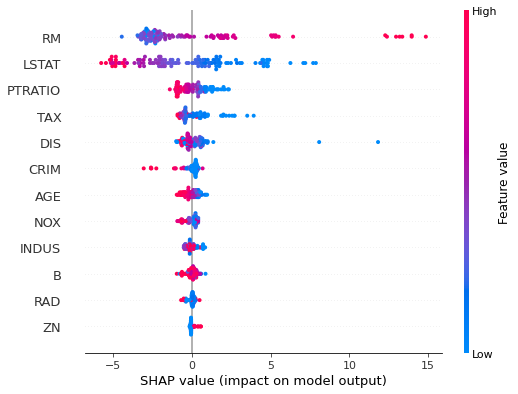

In [34]:
"""
    Check the contributions of the input variable
"""
interpret_model(tuned_model)

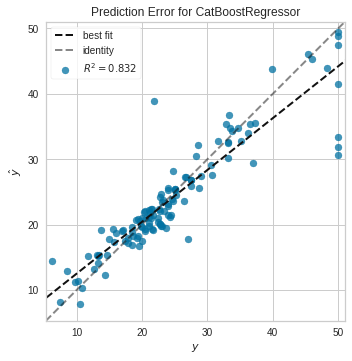

In [35]:
plot_model(tuned_model, plot='error')

In [36]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

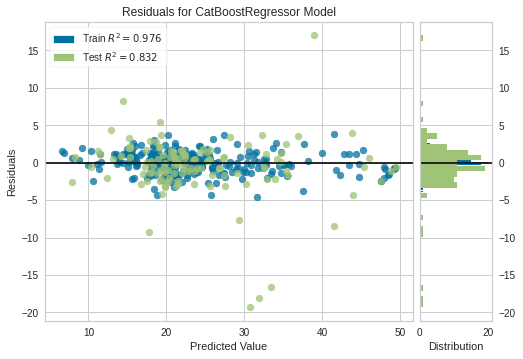

In [37]:
plot_model(tuned_model)